In [1]:
import copy
import numpy as np

from dm_control import suite

import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt

In [2]:
def display_video(frames, framerate=30):
    height, width, _ = frames[0].shape
    dpi = 70
    orig_backend = matplotlib.get_backend()
    matplotlib.use('Agg')  # Switch to headless 'Agg' to inhibit figure rendering.
    fig, ax = plt.subplots(1, 1, figsize=(width / dpi, height / dpi), dpi=dpi)
    matplotlib.use(orig_backend)  # Switch back to the original backend.
    ax.set_axis_off()
    ax.set_aspect('equal')
    ax.set_position([0, 0, 1, 1])
    im = ax.imshow(frames[0])
    def update(frame):
        im.set_data(frame)
        return [im]
    interval = 1000/framerate
    anim = animation.FuncAnimation(fig=fig, func=update, frames=frames,
                                   interval=interval, blit=True, repeat=False)
    return anim


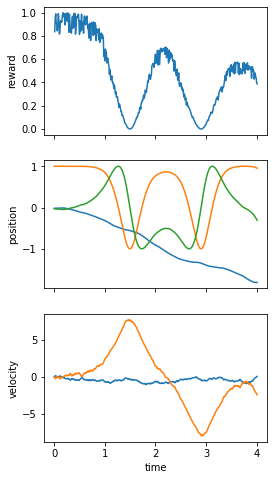

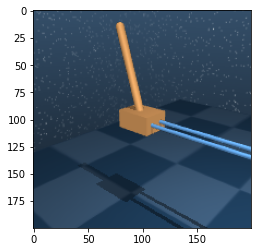

In [3]:
random_state = np.random.RandomState(42)

env = suite.load("cartpole", "balance")
spec = env.action_spec()

duration = 4  # Seconds
frames = []
ticks = []
rewards = []
observations = []

while env.physics.data.time < duration:
    action = random_state.uniform(spec.minimum, spec.maximum, spec.shape)
    time_step = env.step(action)

    camera0 = env.physics.render(camera_id=0, height=200, width=200)
    camera1 = env.physics.render(camera_id=1, height=200, width=200)
    frames.append(np.hstack((camera0, camera1)))
    rewards.append(time_step.reward)
    observations.append(copy.deepcopy(time_step.observation))
    ticks.append(env.physics.data.time)

    #print(env.physics.data.time, time_step)

anim = display_video(frames, framerate=1./env.control_timestep())

num_sensors = len(time_step.observation)

_, ax = plt.subplots(1 + num_sensors, 1, sharex=True, figsize=(4, 8))
ax[0].plot(ticks, rewards)
ax[0].set_ylabel('reward')
ax[-1].set_xlabel('time')

for i, key in enumerate(time_step.observation):
    data = np.asarray([observations[j][key] for j in range(len(observations))])
    ax[i+1].plot(ticks, data, label=key)
    ax[i+1].set_ylabel(key)

writervideo = animation.FFMpegWriter(fps=1./env.control_timestep())
anim.save('cartpole.mp4', writer=writervideo)

plt.figure()
plt.imshow(camera1)

In [4]:
print(time_step)
print(np.concatenate(list(time_step.observation.values())))


TimeStep(step_type=<StepType.MID: 1>, reward=0.3875678885921689, discount=1.0, observation=OrderedDict([('position', array([-1.8148344 ,  0.95104248, -0.3090602 ])), ('velocity', array([ 0.07898207, -2.40315964]))]))
[-1.8148344   0.95104248 -0.3090602   0.07898207 -2.40315964]


In [8]:
from util.util import DMC2GymWrapper

env_dmc = suite.load("cartpole", "balance")
env_gym = DMC2GymWrapper(env_dmc, max_step=100)

In [9]:
obs = env_gym.reset()
for i in range(2000):
    obs, r, done, info = env_gym.step(env_gym.sample_action())
    print(env_gym._step, obs, r, done, info)
    if done:
        print("Done!")
        break

1 [ 0.08422106  0.99980798 -0.01959581  0.05441394 -0.08686791] 0.9342472788715498 False {}
2 [ 0.08454167  0.99979694 -0.02015142  0.00970892 -0.02429045] 0.955504482765127 False {}
3 [ 0.08449729  0.99979592 -0.02020173 -0.01858557  0.01422434] 0.9808237709169259 False {}
4 [ 0.08434324  0.99979756 -0.02012055 -0.01222428  0.00201847] 0.9970413040377573 False {}
5 [ 0.08469554  0.99978346 -0.02080938  0.08268566 -0.13983207] 0.8081293617633475 False {}
6 [ 0.08587241  0.99974153 -0.02273492  0.15269    -0.24541516] 0.8926108192749749 False {}
7 [ 0.08715475  0.99969126 -0.02484738  0.10377944 -0.17725101] 0.9456253865528783 False {}
8 [ 0.08821741  0.99964419 -0.02667395  0.1087548  -0.18823152] 0.9954793404562277 False {}
9 [ 0.08964728  0.9995772  -0.02907601  0.17722262 -0.29242705] 0.8958971501057229 False {}
10 [ 0.09147593  0.99948457 -0.03210303  0.18851084 -0.31333714] 0.9902822078412894 False {}
11 [ 0.093398    0.99937632 -0.03531247  0.19590705 -0.32899904] 0.9911647939250